In [2]:
import yfinance as yf 
import kmapper as km 
from kmapper.jupyter import display
import umap.umap_ as umap
import sklearn
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.cluster import KMeans











In [3]:
# Leer los datos
performance_data = pd.read_csv('StudentsPerformance.csv')

# Seleccionar solo las columnas relevantes para el análisis
data = performance_data[['math score', 'reading score', 'writing score']].values

# Calcular el puntaje promedio de lectura y escritura
mean_outer_score = (data[:, 1] + data[:, 2]) / 2.0

# Inicializar KeplerMapper
mapper = km.KeplerMapper(verbose=1)

# Proyección sobre el puntaje de matemáticas (primera columna de datos)
projected_data = mapper.fit_transform(data, projection=[0])

# Definir los parámetros para la cobertura
covering = km.Cover(n_cubes=8, perc_overlap=0.2)

# Calcular la inercia para varios valores de k para el método del codo
sse = []
max_clusters = 8
for k in range(1, max_clusters):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)


KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (1000, 3)

..Projecting data using: [0]

..Scaling with: MinMaxScaler()



c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

El codo se encuentra en k=6


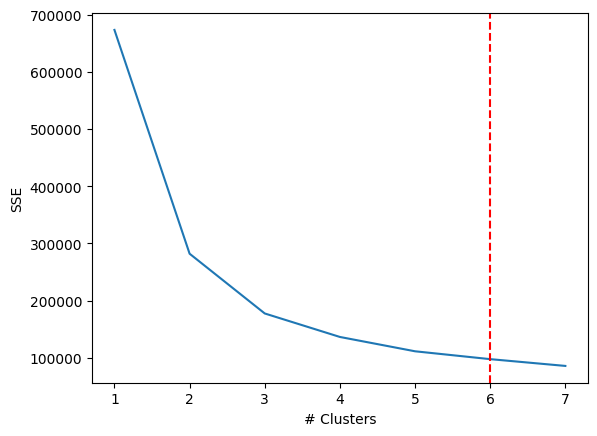

In [4]:
# Encontrar el punto de inflexión en la curva del codo
diff = np.diff(sse)
diff_ratio = diff / sse[:-1]
inflection_idx = np.argmax(diff_ratio) + 1

# Visualizar el codo
print(f'El codo se encuentra en k={inflection_idx}')
plt.plot(range(1, max_clusters), sse)
plt.xticks(range(1, max_clusters))
plt.xlabel("# Clusters")
plt.ylabel("SSE")
plt.axvline(x=inflection_idx, color='r', linestyle='--')
plt.show()


In [5]:
# Crear el grafo utilizando KeplerMapper
G = mapper.map(projected_data, data, clusterer=sklearn.cluster.KMeans(n_clusters=int(inflection_idx)), cover=covering)

# Visualizar el grafo
mapper.visualize(G, 
                title='Performance Data based on Math Score and Mean of other two',
                color_values=mean_outer_score,
                color_function_name='Mean of Reading and Writing Score',
                node_color_function=np.array(['average', 'std', 'sum', 'max', 'min']))

# Guardar la visualización como archivo HTML
km.jupyter.display("performance_math_score.html")

# Aplicar KMeans clustering en los datos totales
kmeans_total = KMeans(n_clusters=8, random_state=0).fit(data)
labels_total = kmeans_total.labels_
centroids_total = kmeans_total.cluster_centers_

Mapping on data shaped (1000, 3) using lens shaped (1000, 1)

Creating 8 hypercubes.


c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\


Created 39 edges and 42 nodes in 0:00:00.467234.
Wrote visualization to: mapper_visualization_output.html


C:\Users\ivana\AppData\Roaming\Python\Python39\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


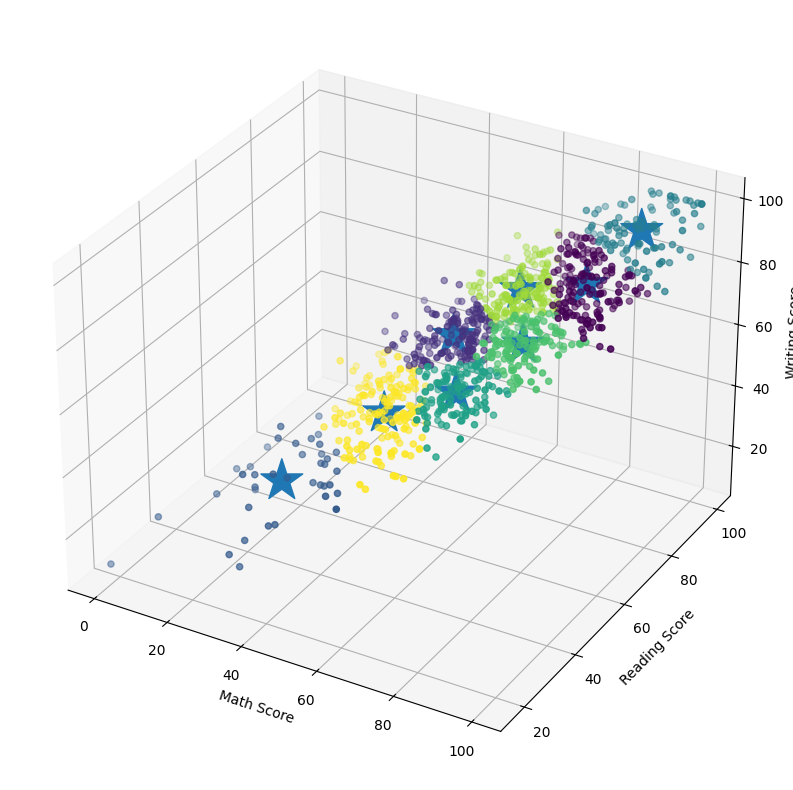

In [6]:
# Crear un scatter plot 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels_total, s=20, cmap='viridis')
ax.scatter(centroids_total[:, 0], centroids_total[:, 1], centroids_total[:, 2], s=1000, alpha=1, marker='*')

# Etiquetar los ejes
ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')
ax.set_zlabel('Writing Score')

# Mostrar el gráfico
plt.show()


### EJERCICIO 2

In [7]:
# Cargar los nombres de los tickers desde el archivo
with open('SP500_tickernames.txt', 'r') as f:
    ticker_names = f.read().splitlines()

# Descargar los datos de los precios de las acciones
start_date_string = "2020-01-01"
end_date_string = "2022-04-02"
raw_data = yf.download(ticker_names, start=start_date_string, end=end_date_string)


[*********************100%%**********************]  495 of 495 completed

25 Failed downloads:
['FBHS', 'NLSN', 'VIAC', 'CERN', 'CTXS', 'DISCK', 'XLNX', 'FRC', 'CDAY', 'RE', 'PKI', 'DRE', 'PBCT', 'INFO', 'ANTM', 'DISH', 'BLL', 'NLOK', 'ATVI', 'TWTR', 'FB', 'ABC', 'DISCA']: Exception('%ticker%: No timezone found, symbol may be delisted')
['FISV']: Exception("%ticker%: Data doesn't exist for startDate = 1577854800, endDate = 1648872000")
['SIVB']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


In [9]:
from sklearn.preprocessing import StandardScaler
# Eliminar NaN columns y normalizar los datos
df_close = raw_data["Adj Close"].dropna(axis="columns")
data_normalized = StandardScaler().fit_transform(df_close)

# Calcular el retorno porcentual
returns = (df_close.iloc[-1] - df_close.iloc[0]) / df_close.iloc[0]

### AGRUPADO POR RETURN

In [10]:
# Crear un DataFrame con los tickers y sus retornos
df_returns = pd.DataFrame({"Ticker": returns.index, "Return": returns.values})

# Realizar el clustering de K-means en los retornos
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_returns["Cluster"] = kmeans.fit_predict(df_returns[['Return']])

c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
# Realizar el clustering de K-means en los retornos
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_returns["Cluster"] = kmeans.fit_predict(df_returns[['Return']])

c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


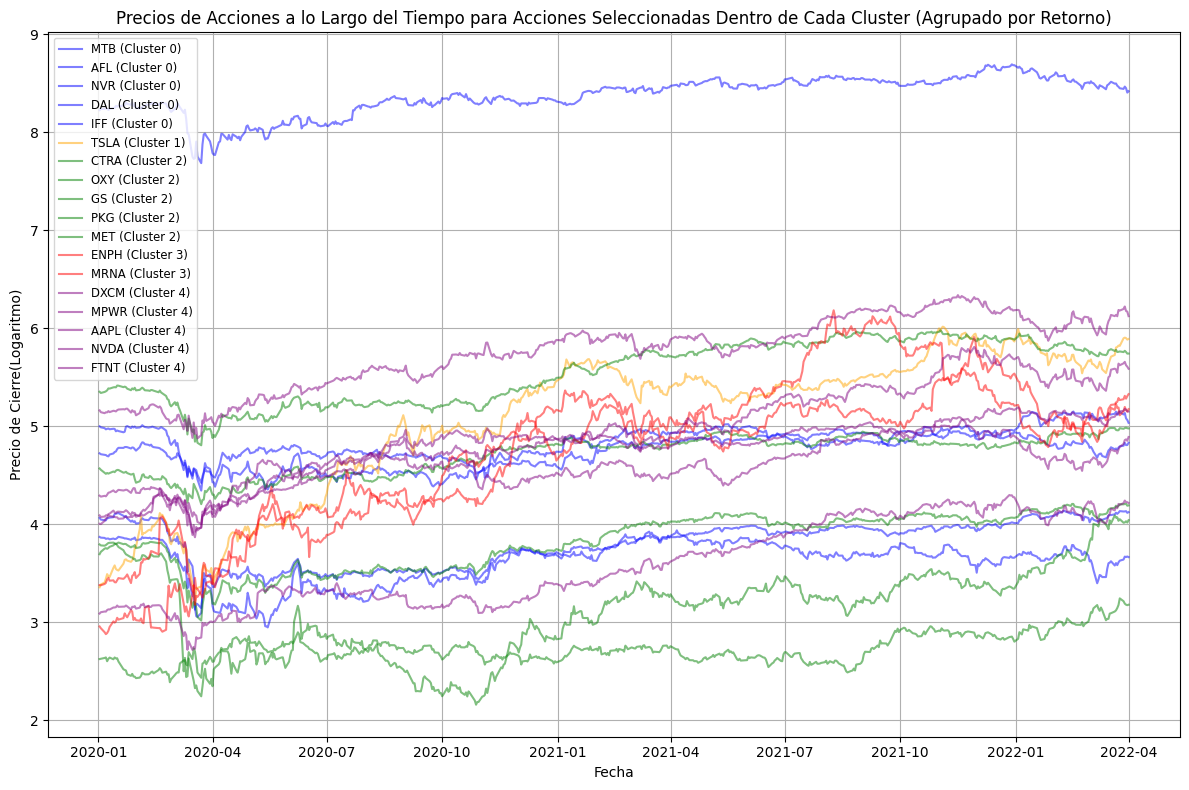

In [14]:
# Seleccionar solo 5 elementos de cada cluster
selected_stocks = pd.DataFrame(columns=['Ticker', 'Cluster'])
for cluster in range(num_clusters):
    clustered_stocks = df_returns[df_returns["Cluster"] == cluster]
    if len(clustered_stocks) >= 5:
        clustered_stocks = clustered_stocks.sample(n=5, random_state=42)
    selected_stocks = pd.concat([selected_stocks, clustered_stocks])

plt.figure(figsize=(12, 8))
colors = ['blue', 'orange', 'green', 'red', 'purple']

for index, row in selected_stocks.iterrows():
    stock = row['Ticker']
    cluster = row['Cluster']
    plt.plot(df_close.index, np.log(df_close[stock]), label=f'{stock} (Cluster {cluster})', color=colors[cluster], alpha=0.5)

plt.title('Precios de Acciones a lo Largo del Tiempo para Acciones Seleccionadas Dentro de Cada Cluster (Agrupado por Retorno)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre(Logaritmo)')#Logaritmico
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

### AGRUPADO POR PRECIO


In [15]:
# Realizar el clustering de K-means en los precios de las acciones

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_close_clustered = pd.DataFrame({"Ticker": df_close.columns, "Cluster": kmeans.fit_predict(df_close.T)})


# Seleccionar solo 5 elementos de cada cluster
selected_stocks = pd.DataFrame(columns=['Ticker', 'Cluster'])
for cluster in range(num_clusters):
    clustered_stocks = df_close_clustered[df_close_clustered["Cluster"] == cluster]
    if len(clustered_stocks) >= 5:
        clustered_stocks = clustered_stocks.sample(n=5, random_state=42)
    selected_stocks = pd.concat([selected_stocks, clustered_stocks])

c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


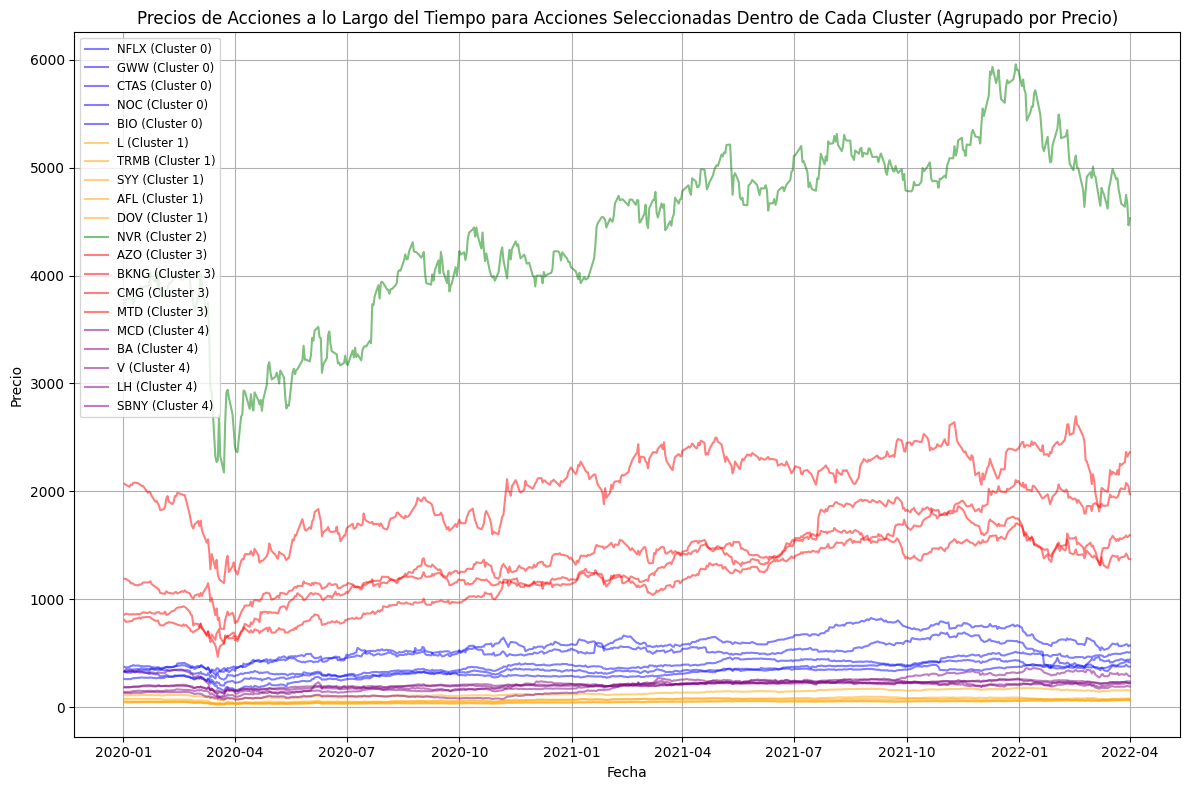

In [16]:
# Plot de los precios a lo largo del tiempo para cada acción seleccionada
plt.figure(figsize=(12, 8))
colors = ['blue', 'orange', 'green', 'red', 'purple']

for index, row in selected_stocks.iterrows():
    stock = row['Ticker']
    cluster = row['Cluster']
    plt.plot(df_close.index, df_close[stock], label=f'{stock} (Cluster {cluster})', color=colors[cluster], alpha=0.5)

plt.title('Precios de Acciones a lo Largo del Tiempo para Acciones Seleccionadas Dentro de Cada Cluster (Agrupado por Precio)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()